# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [25]:
# required Library
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load the data
Titanic=pd.read_csv('titanic_train.csv')

In [27]:
# print the first 10 rows of titanic dataset

Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# Get a  total number of Rows & Columns
Titanic.shape

(891, 12)

In [30]:
# Get data in statistics form.
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# Lets Describe string values
Titanic.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barton, Mr. David John",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [32]:
# Get a count of number of survivors on Titanic
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

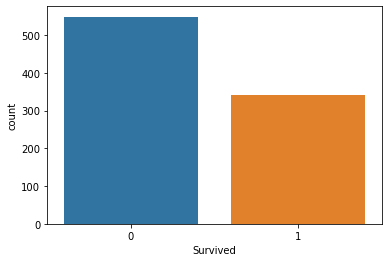

In [33]:
# Visualize the count of number of survivors
sns.countplot(Titanic['Survived'])

In [34]:
# Let's find out the mean values of survivors with different group 
titanic=Titanic.groupby('Survived').mean()
print(titanic)

          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408


# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'survivors w.r.t Embarked & Sex')

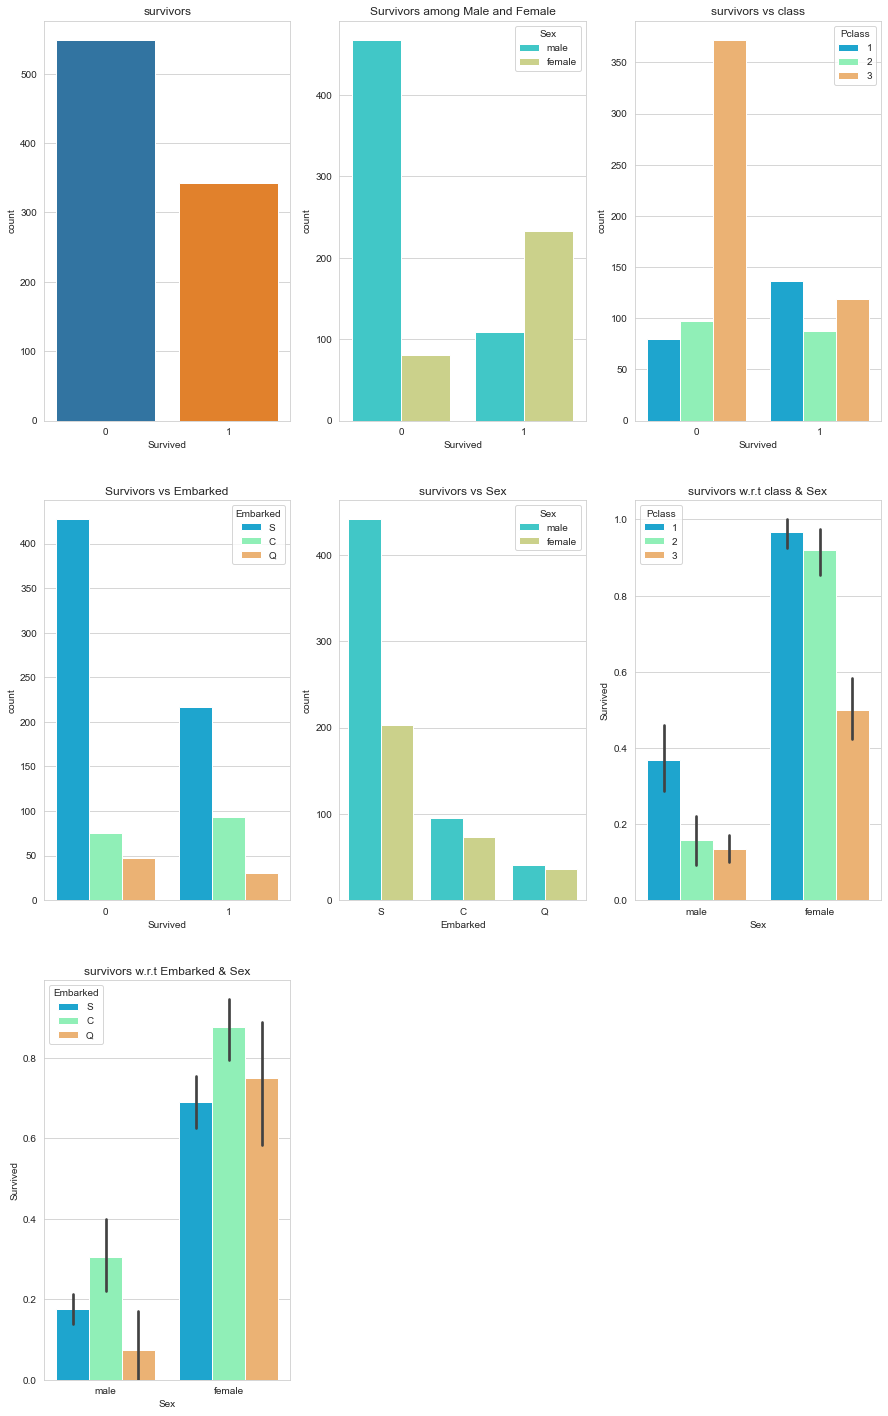

In [35]:
plt.figure(figsize=(15,25))
sns.set_style("whitegrid")
plt.subplot(3,3,1)
sns.countplot(Titanic["Survived"]).set_title("survivors")
plt.subplot(3,3,2)
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=Titanic,palette="rainbow").set_title("Survivors among Male and Female")
plt.subplot(3,3,3)
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=Titanic,palette="rainbow").set_title("survivors vs class")
plt.subplot(3,3,4)
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Embarked",data=Titanic,palette="rainbow").set_title("Survivors vs Embarked")
plt.subplot(3,3,5)
sns.set_style("whitegrid")
sns.countplot(x="Embarked",hue="Sex",data=Titanic,palette="rainbow").set_title("survivors vs Sex")
plt.subplot(3,3,6)
sns.set_style("whitegrid")
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=Titanic,palette="rainbow").set_title("survivors w.r.t class & Sex")
plt.subplot(3,3,7)
sns.set_style("whitegrid")
sns.barplot(x="Sex",y="Survived",hue="Embarked",data=Titanic,palette="rainbow").set_title("survivors w.r.t Embarked & Sex")

In [36]:
#checking for Null values
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#findind mean value for Age
Titanic["Age"].mean()

29.69911764705882

In [38]:
#replacing the mean value with NaN values in Age attribute 
Titanic["Age"].fillna(Titanic["Age"].mean(),inplace=True)
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
#dropping Cabin attribute since it has a lot of missing values
Titanic.drop(["Cabin"],axis=1,inplace=True)
Titanic
Titanic.dropna(inplace=True)
Titanic.shape

(889, 11)

In [40]:
#Checking Null Value again, if we have in any coloumn
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Since we no Null values in any of the given attributes we proceed with further data analysis.

<AxesSubplot:xlabel='Age', ylabel='Density'>

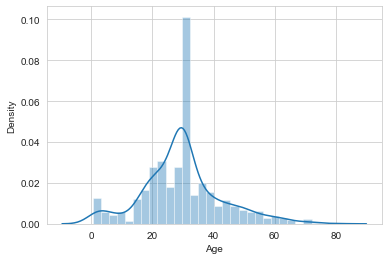

In [41]:
#UNIVARIATE ANALYSIS,BIVARIATE AND MULTI-VARIATE ANALYSIS
sns.distplot(Titanic["Age"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

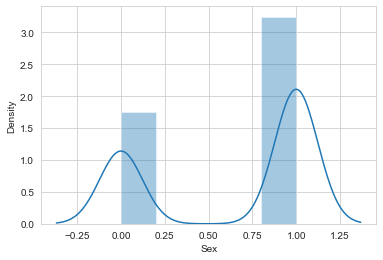

In [42]:
# Check the rate of survivors between male females and child
Titanic.Sex=Titanic.Sex.map({"male":1, "female":0})
sns.distplot(Titanic["Sex"])

Male are higher than female among all the passengers.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

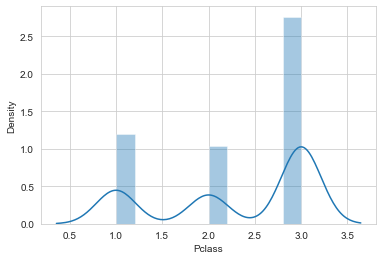

In [43]:
sns.distplot(Titanic["Pclass"])

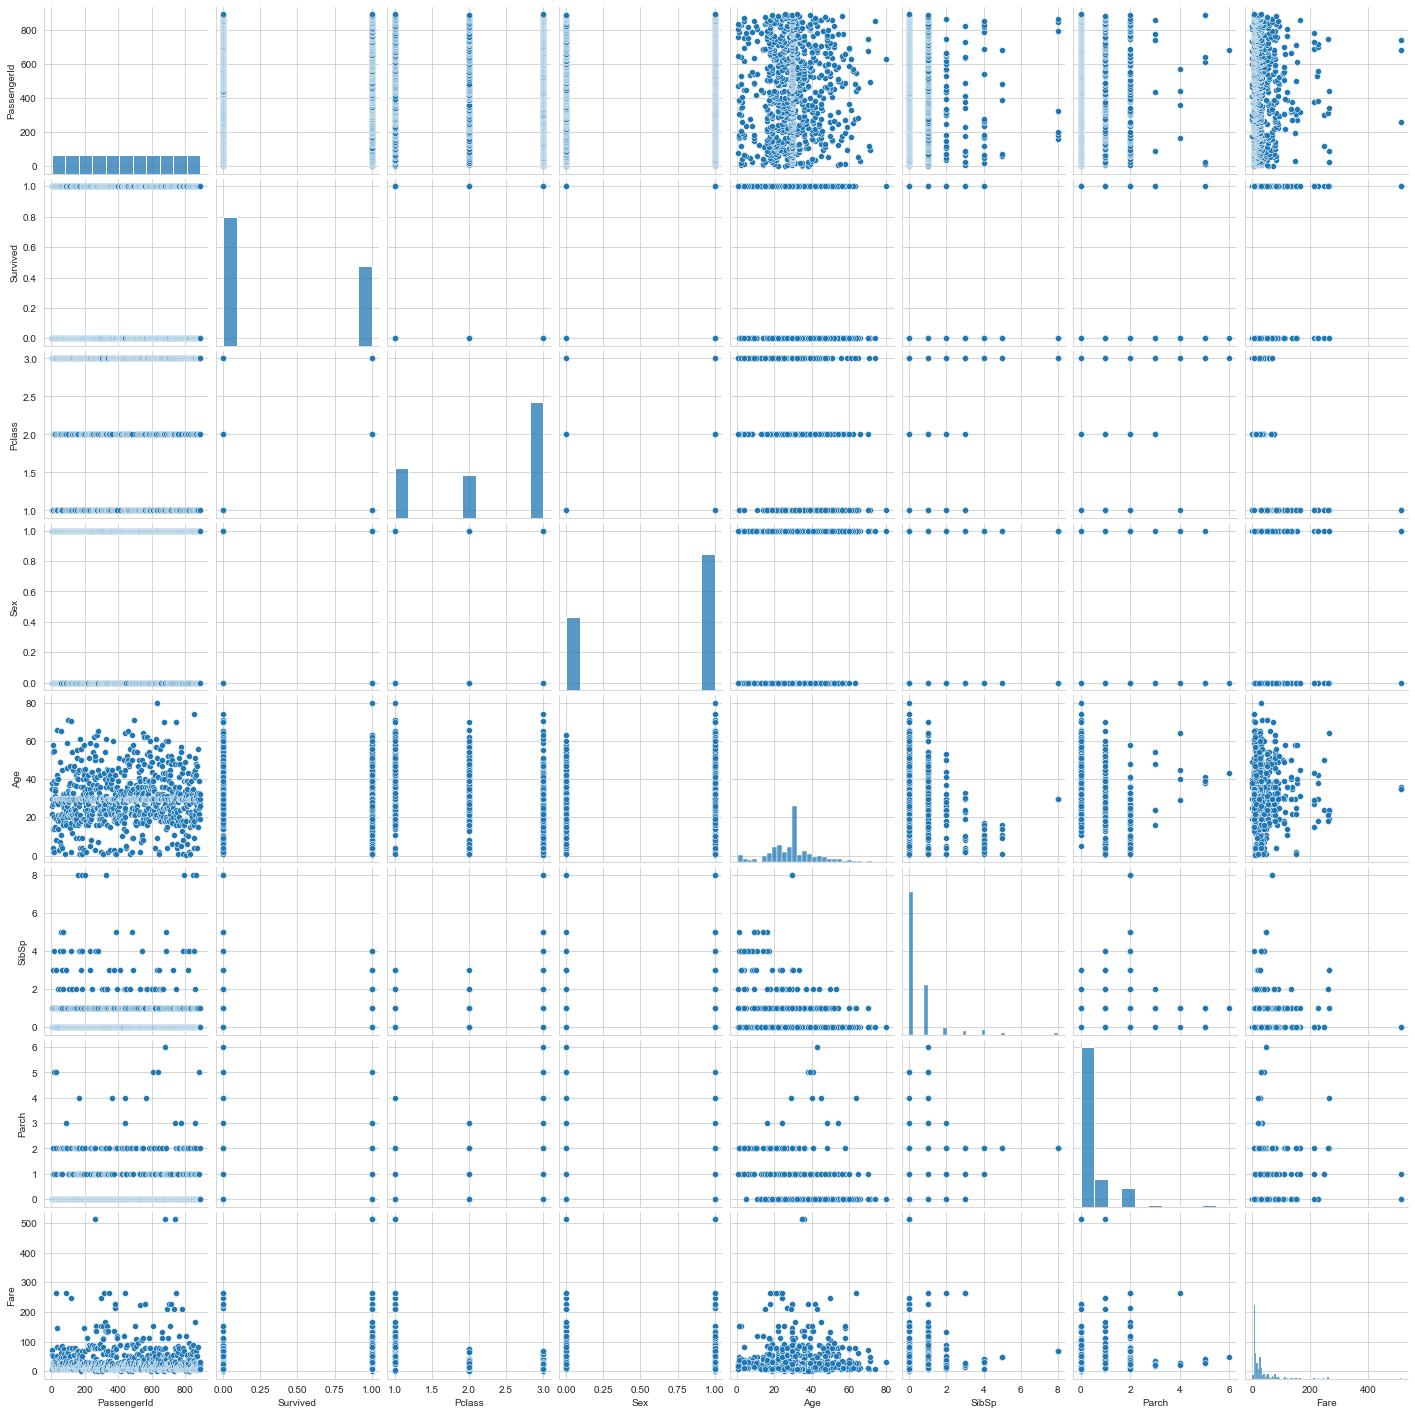

In [44]:
sns.pairplot(Titanic)

In [45]:
dfcor=Titanic.corr()
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000


Many attributes such as Name,Fare,sibsb,tickets,pclass,embarked will have to be removed to check the accuracy of the given mode

In [46]:
#removing the unwanted attributes for this analysis.
Titanic.drop(["Name","Fare","SibSp","Parch","Ticket","Pclass","Embarked"],axis=1,inplace=True)
Titanic.head()

,PassengerId,Survived,Sex,Age
0,1,0,1,22.0
1,2,1,0,38.0
2,3,1,0,26.0
3,4,1,0,35.0
4,5,0,1,35.0


# ANALYSING THE OUTLIERS
An outlier is an element of a data set that distinctly stands out from the rest of the data. In other words, outliers are those data points that lie outside the overall pattern of distribution. The easiest way to detect outliers is to create a graph. Plots such as Box plots, Scatterplots and Histograms can help to detect outliers. Alternatively, we can use mean and standard deviation to list out the outliers. Interquartile Range and Quartiles can also be used to detect outliers.

PassengerId       AxesSubplot(0.125,0.125;0.168478x0.755)
Survived       AxesSubplot(0.327174,0.125;0.168478x0.755)
Sex            AxesSubplot(0.529348,0.125;0.168478x0.755)
Age            AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

<Figure size 1440x1440 with 0 Axes>

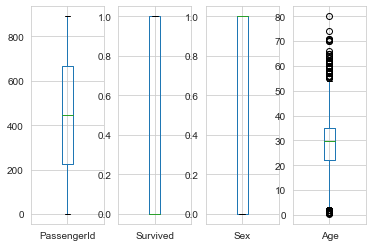

In [47]:
plt.figure(figsize=(20,20))
Titanic.plot(kind="box",subplots=True)

# REMOVING THE OUTLIERS

In [48]:
from scipy.stats import zscore
zs=np.abs(zscore(Titanic))
zs

array([[1.73250451, 0.78696114, 0.73534203, 0.59049493],
       [1.72861124, 1.27071078, 1.35991138, 0.64397101],
       [1.72471797, 1.27071078, 1.35991138, 0.28187844],
       ...,
       [1.72471797, 0.78696114, 1.35991138, 0.00352373],
       [1.72861124, 1.27071078, 0.73534203, 0.28187844],
       [1.73250451, 0.78696114, 0.73534203, 0.18104628]])

In [49]:
threshold=3
Titanic_new=Titanic[(zs<3).all(axis=1)]
Titanic_new

,PassengerId,Survived,Sex,Age
0,1,0,1,22.000000
1,2,1,0,38.000000
2,3,1,0,26.000000
3,4,1,0,35.000000
4,5,0,1,35.000000
...,...,...,...,...
886,887,0,1,27.000000
887,888,1,0,19.000000
888,889,0,0,29.699118
889,890,1,1,26.000000


In [50]:
print(Titanic.shape)
print(Titanic_new.shape)

(889, 4)
(882, 4)


# MODEL TRAINING

In [51]:
#SEPERATING DEPENDENT AND IN-DEPENDENT VARIABLES
x=Titanic_new.drop("Survived",axis=1)
y=Titanic_new["Survived"]

#SPLITTING THE TESTING AND TRAINING DATAS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [52]:
x_train.shape

(687, 3)

In [53]:
y_train.shape

(687,)

In [54]:
x_test.shape

(195, 3)

In [55]:
y_test.shape

(195,)

# FINDING ACCURACY OF THE GIVEN DATASET

In [56]:
#Logical Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)#training
lr_pre=lr.predict(x_test)#testing
print(lr_pre)
print("\nAccuracy : ",accuracy_score(y_test,lr_pre))
print("\nConfusion matrix : ",confusion_matrix(y_test,lr_pre))
print("\nclassification report : ",classification_report(y_test,lr_pre))

[1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1]

Accuracy :  0.7948717948717948

Confusion matrix :  [[99 23]
 [17 56]]

classification report :                precision    recall  f1-score   support

           0       0.85      0.81      0.83       122
           1       0.71      0.77      0.74        73

    accuracy                           0.79       195
   macro avg       0.78      0.79      0.78       195
weighted avg       0.80      0.79      0.80       195



In [57]:
#Random Forest Regressor Method
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rfr=RandomForestRegressor(criterion="mae",n_estimators=200)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pre=rfr.predict(x_test)
pre
r2score=r2_score(y_test,pre)
cvs=cross_val_score(rfr,x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_value_score={cvs*100},and difference={(r2score*100)-(cvs*100)}")

Accuracy=28.19424966314845,cross_value_score=16.135188760408237,and difference=12.059060902740214


In [58]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
dcr=DecisionTreeRegressor(criterion="friedman_mse")
dcr.fit(x_train,y_train)
dcr.score(x_train,y_train)
pre=dcr.predict(x_test)
pre
r2score=r2_score(y_test,pre)
cvs=cross_val_score(dcr,x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_value_score={cvs*100},and difference={(r2score*100)-(cvs*100)}")

Accuracy=-31.37210869077025,cross_value_score=-37.735212241423596,and difference=6.363103550653346


In [59]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y=knn.predict(x_test)

print("Accuracy Score",accuracy_score(y_test,knn_y))
print("Confusion Matrix\n",confusion_matrix(y_test,knn_y))
print("Classification Report\n", classification_report(y_test,knn_y))

Accuracy Score 0.5435897435897435
Confusion Matrix
 [[83 39]
 [50 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.68      0.65       122
           1       0.37      0.32      0.34        73

    accuracy                           0.54       195
   macro avg       0.50      0.50      0.50       195
weighted avg       0.53      0.54      0.53       195



In [60]:
#Support Vector Machine

from sklearn.svm import SVC

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    svc_y=svc.predict(x_test)
    print("Accuracy Score",accuracy_score(y_test,svc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,svc_y))
    print("Classification Report\n", classification_report(y_test,svc_y))
svmkernel('rbf')

Accuracy Score 0.6256410256410256
Confusion Matrix
 [[122   0]
 [ 73   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       122
           1       0.00      0.00      0.00        73

    accuracy                           0.63       195
   macro avg       0.31      0.50      0.38       195
weighted avg       0.39      0.63      0.48       195



In [61]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_y=abc.predict(x_test)

print("Accuracy Score",accuracy_score(y_test,abc_y))
print("Confusion Matrix\n",confusion_matrix(y_test,abc_y))
print("Classification Report\n", classification_report(y_test,abc_y))

Accuracy Score 0.8102564102564103
Confusion Matrix
 [[99 23]
 [14 59]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       122
           1       0.72      0.81      0.76        73

    accuracy                           0.81       195
   macro avg       0.80      0.81      0.80       195
weighted avg       0.82      0.81      0.81       195



In [62]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc=AdaBoostClassifier()
gbc.fit(x_train,y_train)
gbc_y=gbc.predict(x_test)

print("Accuracy Score",accuracy_score(y_test,gbc_y))
print("Confusion Matrix\n",confusion_matrix(y_test,gbc_y))
print("Classification Report\n", classification_report(y_test,gbc_y))

Accuracy Score 0.8102564102564103
Confusion Matrix
 [[99 23]
 [14 59]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       122
           1       0.72      0.81      0.76        73

    accuracy                           0.81       195
   macro avg       0.80      0.81      0.80       195
weighted avg       0.82      0.81      0.81       195



On the basis of Accuracy score, the best model is done by Logical Regression, AdaBoostClassifier, GradientBoostingClassifier having accuracy b/w 75% -85%.

In [63]:
#creating parameter list to pass in gridsearch CV
param_grid_lr=[{"C":[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]

In [64]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lr,param_grid=param_grid_lr,scoring="accuracy",cv=10,refit=True,n_jobs=1)
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print("accuracy = ",r2_score(y_test,GCV_pred)*100)

accuracy =  12.418594206153166


In [65]:
import joblib 
joblib.dump(lr,"titanic_survivor.pkl")

['titanic_survivor.pkl']

In [66]:
#PREDICTING THE SURVIVAL RATE WITH A SAMPLE
td=np.array([15,0,3.500])
td.shape

(3,)

In [67]:
td=td.reshape(1,-1)
td

array([[15. ,  0. ,  3.5]])

In [68]:
lr.predict(td)

array([1], dtype=int64)

In [69]:
i=np.array(y_test)
i

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [70]:
df_com=pd.DataFrame({"original":i,"predicted":pre},index=range(len(i)))
df_com

,original,predicted
0,1,1.0
1,1,1.0
2,0,0.0
3,0,0.0
4,0,1.0
...,...,...
190,0,0.0
191,0,1.0
192,1,1.0
193,0,1.0


# CONCLUSION:
THE ABOVE OBSERVATIONS SHOW THAT THE MODEL HAS PREDICTED THE VALUES WITH AN ACCURACY OF 75-85%